# Laboration 1 Medical Prediction

---

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, f1_score


In [113]:
cardio_data = pd.read_csv("../Laboration_1_Medical_Prediction/Data/cardio_train.csv", delimiter=";")
cardio_data.drop("id", axis=1, inplace=True)
cardio_data


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [114]:
cardio_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
cardio_count = cardio_data["cardio"].value_counts()
cardio_count = pd.DataFrame({"Positive" : cardio_count[1] , "Negative": cardio_count[0]}, index=[0])
print(f"Postive and negativ for heart and cardiovascular diseases\n {cardio_count.to_string(index=False)}")


Postive and negativ for heart and cardiovascular diseases
  Positive  Negative
    34979     35021


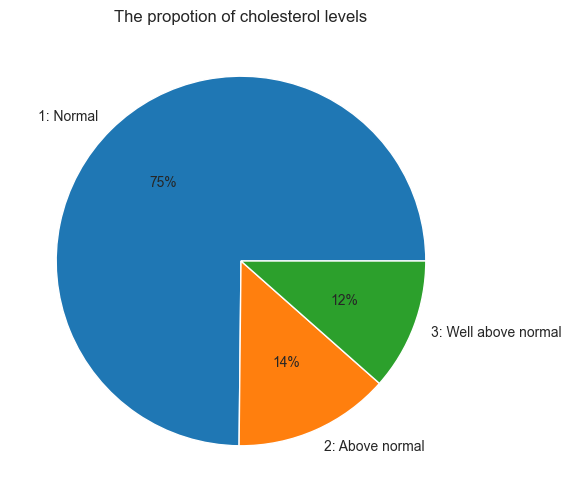

In [116]:
chol_count = cardio_data["cholesterol"].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(chol_count, labels=["1: Normal", "2: Above normal", "3: Well above normal"], autopct="%.0f%%")
plt.title("The propotion of cholesterol levels")
plt.show()


<Axes: xlabel='age', ylabel='Count'>

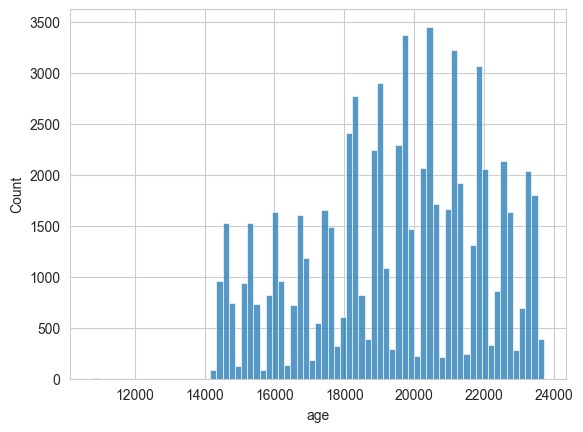

In [117]:
sns.histplot(cardio_data["age"])

Text(0.5, 1.0, 'Number of smokers and non- smokers')

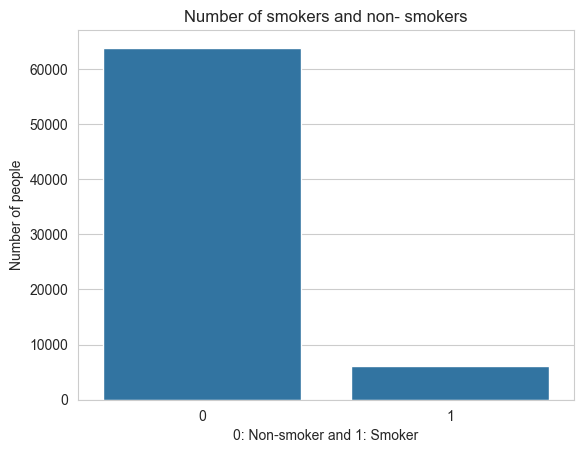

In [118]:
sns.countplot(data=cardio_data, x="smoke")
plt.xlabel("0: Non-smoker and 1: Smoker")
plt.ylabel("Number of people")
plt.title("Number of smokers and non- smokers")

Text(0.5, 1.0, 'Weight of people')

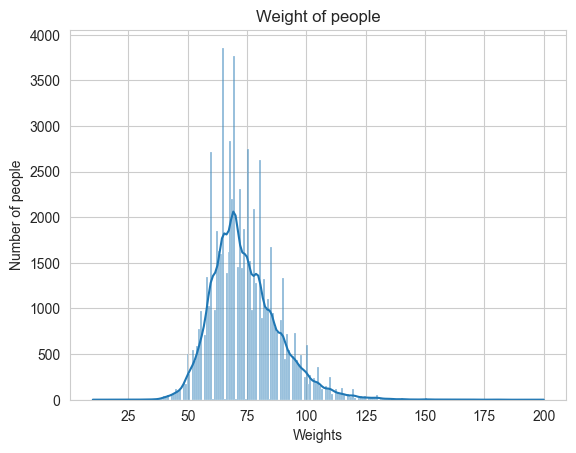

In [119]:
sns.histplot(cardio_data["weight"], kde=True)
plt.xlabel("Weights")
plt.ylabel("Number of people")
plt.title("Weight of people")

Text(0.5, 1.0, 'Height of people')

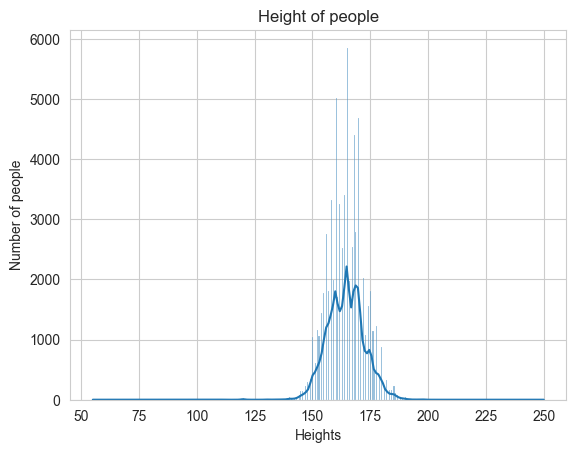

In [120]:
sns.histplot(cardio_data["height"], kde=True)
plt.xlabel("Heights")
plt.ylabel("Number of people")
plt.title("Height of people")

Text(0.5, 1.0, 'Smokers split into genders')

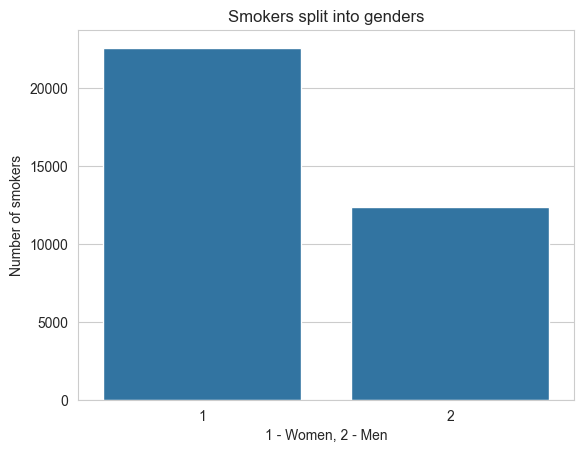

In [121]:
cardio_sex_1 = cardio_data[cardio_data["cardio"] == 1]
sns.countplot(cardio_sex_1, x="gender")
plt.xlabel("1 - Women, 2 - Men")
plt.ylabel("Number of smokers")
plt.title("Smokers split into genders")

### Formula for BMI

$BMI = \frac{weight_kg}{height_{m^2}}$

In [122]:
def bmi(weight, height):
   
   bmi = weight/(height/100)**2

   return bmi

cardio_data["BMI"] = bmi(cardio_data["weight"], cardio_data["height"]) 

cardio_data["BMI"].describe(percentiles=[.05, .1, .15, .25, .5, .75, .95])

# Tänk på std och hur sprdingen är kring medlet. också att 95% täcks av värdet 37.3 och 5% täcks av värdet 20.9 

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
5%          20.936639
10%         22.074100
15%         22.857143
25%         23.875115
50%         26.374068
75%         30.222222
95%         37.385703
max        298.666667
Name: BMI, dtype: float64

In [123]:
cardio_bmi_low = cardio_data[cardio_data["BMI"] <= 20]
cardio_bmi_low_smoke = cardio_bmi_low[cardio_bmi_low["smoke"] == 1]
cardio_bmi_low["cardio"].value_counts()

cardio
0    1351
1     520
Name: count, dtype: int64

In [124]:
cardio_bmi_high = cardio_data[cardio_data["BMI"] >= 54]
cardio_bmi_high["cardio"].value_counts()

cardio
1    84
0    63
Name: count, dtype: int64

In [125]:
cardio_bmi = cardio_data[(cardio_data["BMI"] <= 54) & (cardio_data["BMI"] >= 18)]
cardio_bmi["BMI"].describe(percentiles=[.05, .1, .15, .25, .5, .75, .95])

count    69428.000000
mean        27.509789
std          5.089660
min         18.017206
5%          21.134863
10%         22.189349
15%         22.920971
25%         23.875115
50%         26.423570
75%         30.222222
95%         37.222992
max         53.979239
Name: BMI, dtype: float64

<Axes: ylabel='BMI'>

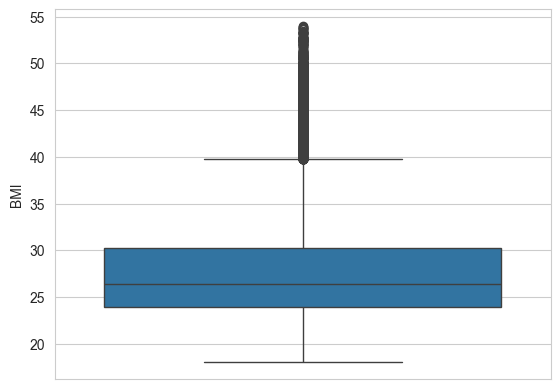

In [126]:
sns.boxplot(cardio_bmi["BMI"])

### Feature engineering BMI

Valde BMI över gräns 54. Tog vad 95 procentilen av hela data setet satt det som den över gränsen först och plockade ut alla värden över det. Kollade vad medlet och standard avvikelsen var tog den över gränsen för standard avvikelsen på medlet. Gjorde sedan en sökning på nättet hur andra har classfierat bmi värdena och kolla om det verka rimligt att gör den slutsatsen jag gjort. Uppgiftten vill sedan att vi katigoriserar datan i normal range, over-weight, obese (class I), obese (class II), obese (class III). Så att lägg över värdet på 54 får vi med obese (class III) i data setet. För litet sökning så hamna var intervallen mellan varje katigori ca 15 BMI.

Plockade bort alla som var underviktiga, låga BMI. För fanns ingen katigorsering i under normal range. Så den 5 procentilen var run 20 i BMI. Vilket blev mitt första val och kollade hur fördelning såg ut under BMI 20. Där låg medlet kring 18 BMI. Så valde medlet i den gruppen som nedre gräns för normal vikt. Kollade igen nätet för att se om det kunde vara rimligt. Det såg det ut att var. Att nedre gräns för BMI låg runt 18 i dom flesta källor jag hittade. Är det intressant vad hjärt och kärlsjukdommar personer har kan vi se att det är liten andel av dom som underviktiga som har någon sjukdom. 

Notering till mig: Ren skriv och kolla vad betygen frågar efter. 

In [127]:
cardio_bmi = cardio_bmi.copy() 
# Too avoid SettingWithCopyWarning error

cardio_bmi["BMI cat"] = pd.cut(cardio_bmi["BMI"], 
                               bins=[18, 25, 30, 35, 40, float("inf")], 
                               labels= ["normal range", "over-weight", "obese (class I)", "obese (class II)", "obese (class III)"])


In [128]:
cardio_data["ap_lo"].describe(percentiles=[.05, .1, .15, .25, .5, .75, .95])

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
5%          70.000000
10%         70.000000
15%         70.000000
25%         80.000000
50%         80.000000
75%         90.000000
95%        100.000000
max      11000.000000
Name: ap_lo, dtype: float64

<Axes: ylabel='ap_lo'>

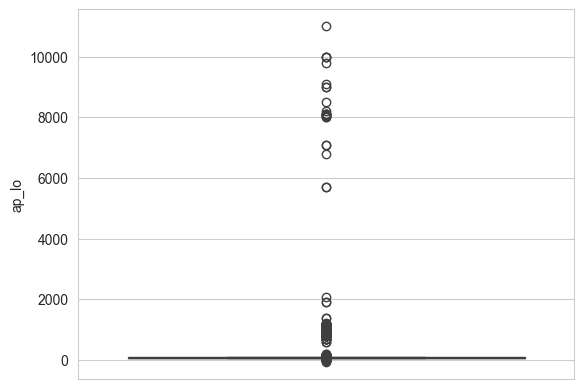

In [129]:
sns.boxplot(cardio_data["ap_lo"])

In [130]:
cardio_bmi = cardio_bmi[(cardio_bmi["ap_hi"] <= 160) & (cardio_bmi["ap_hi"] >= 90)]
cardio_bmi = cardio_bmi[(cardio_bmi["ap_lo"] <= 100) & (cardio_bmi["ap_lo"] >= 70)]
cardio_bmi.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,63168.000000,63168.000000,63168.000000,63168.000000,63168.000000,63168.000000,63168.00000,63168.000000,63168.000000,63168.000000,63168.000000,63168.000000,63168.000000
mean,19486.860056,1.351950,164.527846,74.261168,126.284907,81.736940,1.36232,1.225288,0.087655,0.052827,0.803429,0.496391,27.469918
std,2457.395830,0.477582,7.808478,13.724653,13.782779,7.576162,0.67914,0.572770,0.282795,0.223691,0.397408,0.499991,5.001180
min,10859.000000,1.000000,109.000000,30.000000,90.000000,70.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,18.017206
25%,17711.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19713.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,26.395803
75%,21335.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,23713.000000,2.000000,207.000000,180.000000,160.000000,100.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000,53.979239


<Axes: ylabel='ap_lo'>

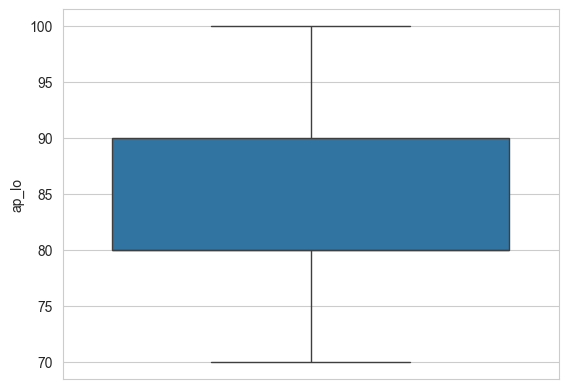

In [131]:
sns.boxplot(cardio_bmi["ap_lo"])

In [132]:
# cardio_data["BPR"] = cardio_data[(cardio_data["ap_hi"]> 100) & (cardio_data["ap_lo"] > 70)] = "Healthy"
#BPR = Blood Pressure Range

cardio_bmi = cardio_bmi.copy()

for i in cardio_bmi.index:
    ap_hi, ap_lo = cardio_bmi.at[i, "ap_hi"], cardio_bmi.at[i, "ap_lo"]
   
    if ap_hi < 120 and ap_lo < 80:
        cardio_bmi.at[i, "BPR"] = "Healty"
    
    elif 120 <= ap_hi <= 129 and ap_lo < 80:
        cardio_bmi.at[i, "BPR"] = "Elevated"
    
    elif (130 <= ap_hi <= 139) or (80 <= ap_lo <= 89):
        cardio_bmi.at[i, "BPR"] = "Stage 1 hypertension"
   
    elif ap_hi >= 140 or ap_lo >= 90:
        cardio_bmi.at[i, "BPR"] = "Stage 2 hypertension"

cardio_bmi["BPR"].value_counts()

BPR
Stage 1 hypertension    39245
Stage 2 hypertension    14248
Healty                   7096
Elevated                 2579
Name: count, dtype: int64

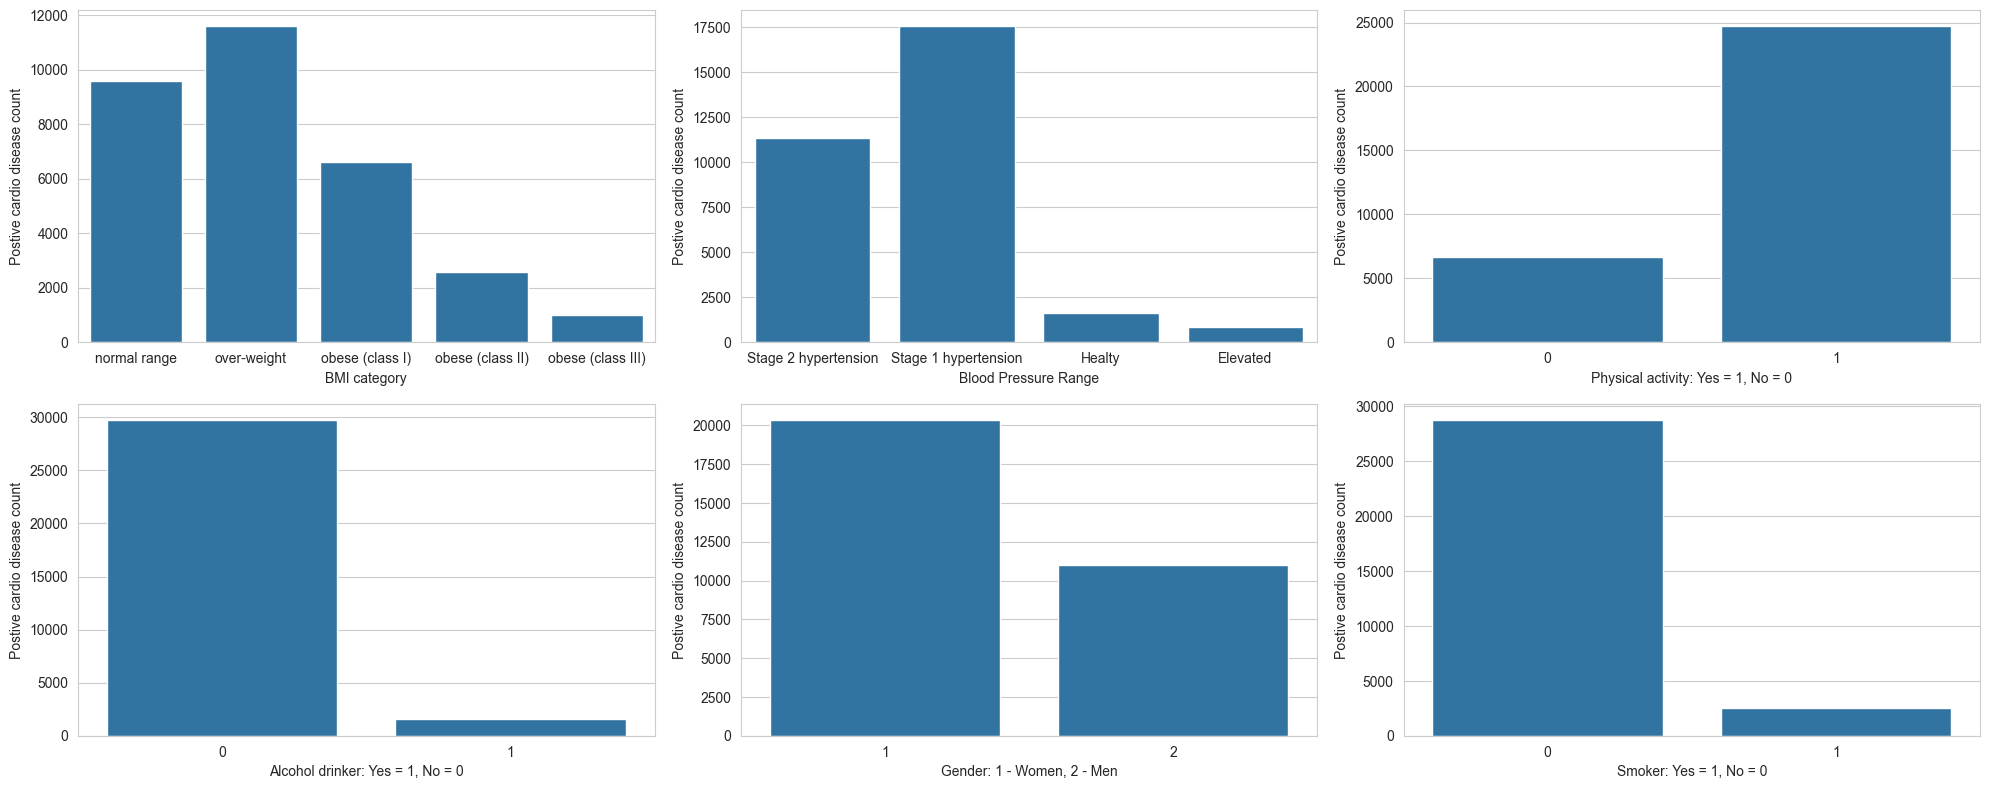

In [133]:
cardio_positive = cardio_bmi[cardio_bmi["cardio"] == 1]
features = ["BMI cat", "BPR", "active", "alco", "gender", "smoke"]
labels = ["BMI category", "Blood Pressure Range", "Physical activity: Yes = 1, No = 0", 
          "Alcohol drinker: Yes = 1, No = 0", "Gender: 1 - Women, 2 - Men", "Smoker: Yes = 1, No = 0"] 

fig, axes = plt.subplots(2, 3, figsize=(20, 8), dpi=100)


for i, ax in enumerate(axes.flatten()):
    sns.countplot(cardio_positive, x=features[i], ax=ax)
    ax.set(xlabel=labels[i], ylabel="Postive cardio disease count")
plt.tight_layout()

<Axes: >

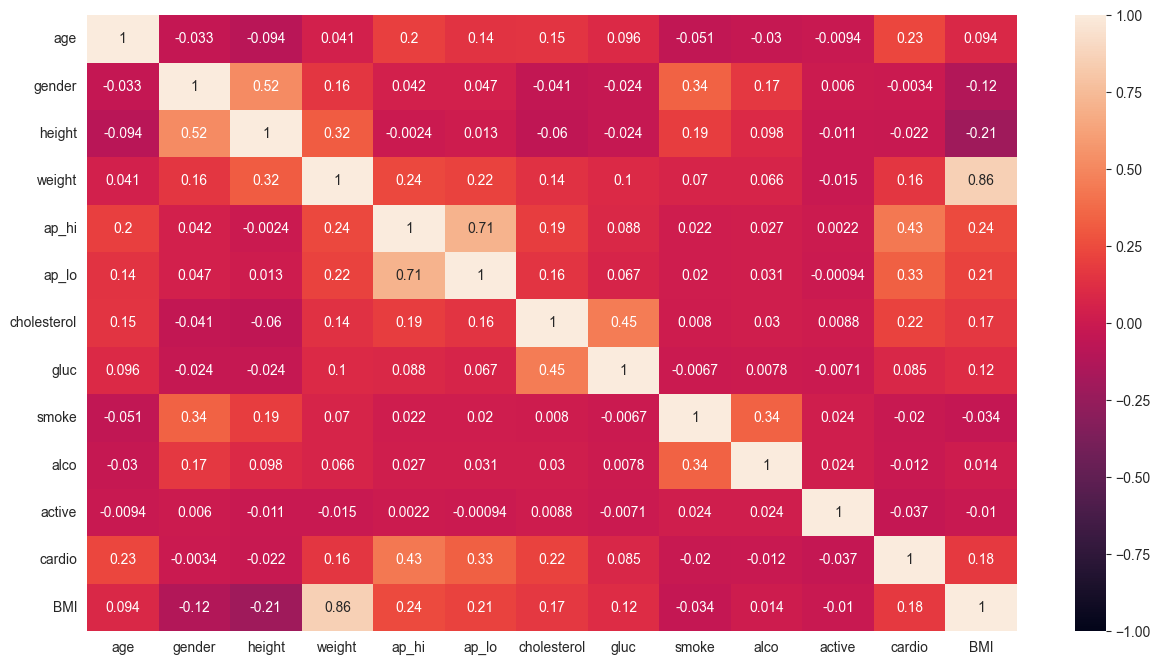

In [134]:
plt.figure(figsize=(15,8))
sns.heatmap(cardio_bmi.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

In [135]:
cardio_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63168 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63168 non-null  int64   
 1   gender       63168 non-null  int64   
 2   height       63168 non-null  int64   
 3   weight       63168 non-null  float64 
 4   ap_hi        63168 non-null  int64   
 5   ap_lo        63168 non-null  int64   
 6   cholesterol  63168 non-null  int64   
 7   gluc         63168 non-null  int64   
 8   smoke        63168 non-null  int64   
 9   alco         63168 non-null  int64   
 10  active       63168 non-null  int64   
 11  cardio       63168 non-null  int64   
 12  BMI          63168 non-null  float64 
 13  BMI cat      63168 non-null  category
 14  BPR          63168 non-null  object  
dtypes: category(1), float64(2), int64(11), object(1)
memory usage: 9.3+ MB


In [136]:
cardio_data1 = cardio_bmi.drop(["ap_hi", "ap_lo", "height", "weight", "BMI"], axis=1)

categorical_columns = ["BMI cat", "BPR", "gender"]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(cardio_data1[categorical_columns])
cardio_data1.reset_index(inplace=True)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
cardio_data1_encoded = pd.concat([cardio_data1, one_hot_df], axis=1)
cardio_data1_encoded = cardio_data1_encoded.drop(categorical_columns, axis=1)


cardio_data2 =  cardio_bmi.drop(["height", "weight", "BMI cat", "BPR"], axis=1)

categorical_columns = ["gender"]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(cardio_data2[categorical_columns])
cardio_data2.reset_index(inplace=True)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
cardio_data2_encoded = pd.concat([cardio_data2, one_hot_df], axis=1)
cardio_data2_encoded = cardio_data2_encoded.drop(categorical_columns, axis=1)

cardio_data1_encoded

,index,age,cholesterol,gluc,smoke,alco,active,cardio,BMI cat_normal range,BMI cat_obese (class I),BMI cat_obese (class II),BMI cat_obese (class III),BMI cat_over-weight,BPR_Elevated,BPR_Healty,BPR_Stage 1 hypertension,BPR_Stage 2 hypertension,gender_1,gender_2
0,0,18393,1,1,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,20228,3,1,0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,18857,3,1,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,17623,1,1,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,21914,2,2,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63163,69994,21074,1,1,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
63164,69995,19240,1,1,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
63165,69996,22601,2,2,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
63166,69998,22431,1,2,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [137]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(cardio_data1_encoded.drop("cardio",axis=1), cardio_data1_encoded["cardio"], test_size=0.33)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_val_1, y_val_1, test_size=0.5)

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(cardio_data2_encoded.drop("cardio",axis=1), cardio_data2_encoded["cardio"], test_size=0.33)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_val_2, y_val_2, test_size=0.5)

X_train_1.shape, X_val_1.shape, X_test_1.shape

((42322, 18), (10423, 18), (10423, 18))

In [138]:
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

pipelines = {}

for name, model in models.items():
    pipelines[f"{name}_Stdz"] = Pipeline([("scaler", StandardScaler()), ("model", model)])
    pipelines[f"{name}_Norm"] = Pipeline([("scaler", MinMaxScaler()), ("model", model)])

In [139]:
param_grids = {
    "SVM_Stdz": {
        "model__C": [0.1, 1, 10],  
        "model__kernel": ["rbf", "poly"],
        "model__gamma": ["scale", "auto"], 
        "model__degree": [3] 
    },
    "SVM_Norm": {
        "model__C": [0.1, 1, 10],  
        "model__kernel": ["rbf", "poly"],
        "model__gamma": ["scale", "auto"],
        "model__degree": [3]  
    },
    "Logistic Regression_Stdz": {
        "model__C": [0.1, 1, 10],  
        "model__solver": ["saga"],  
        "model__penalty": ["elasticnet", "l2"],
        "model__l1_ratio": [0.1, 0.5, 0.9] 
    },
    "Logistic Regression_Norm": {
        "model__C": [0.1, 1, 10],  
        "model__solver": ["saga"],
        "model__penalty": ["elasticnet"],
        "model__l1_ratio": [0.1, 0.5, 0.9]
    },
    "Decision Tree_Stdz": {
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [5, 10, None],  
        "model__max_features": ["sqrt"],
        "model__min_samples_split": [2, 5, 10] 
    },
    "Decision Tree_Norm": {
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [5, 10, None],  
        "model__max_features": ["sqrt"],
        "model__min_samples_split": [2, 5, 10]
    },
    "Random Forest_Stdz": {
        "model__n_estimators": [100, 200],  
        "model__max_depth": [10, 20, None],  
        "model__max_features": ["sqrt"],
        "model__bootstrap": [True, False] 
    },
    "Random Forest_Norm": {
        "model__n_estimators": [100, 200],  
        "model__max_depth": [10, 20, None],  
        "model__max_features": ["sqrt"],
        "model__bootstrap": [True, False]
    }
}


In [ ]:
model_hyper_params = {}
datasets = [[X_train_1, y_train_1, X_val_1, y_val_1], [X_train_2, y_train_2, X_val_2, y_val_2]]

for name, model in pipelines.items():
    start_time = time.time() 
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        scoring={"f1": "f1_weighted", "recall": "recall_weighted"},
        refit="f1",
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    if name not in model_hyper_params:
        model_hyper_params[name] = {}

    for i, data in enumerate(datasets):
        grid_search.fit(data[0], data[1])  
        y_pred = grid_search.predict(data[2])  

        model_hyper_params[name][f"Dataset_{i}"] = {
            "Best params": grid_search.best_params_,
            "recall": recall_score(data[3], y_pred, average="weighted"),
            "f1_score": f1_score(data[3], y_pred, average="weighted")
        }

    elapsed_time = time.time() - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Time taken: {minutes}m {seconds}s for model {name}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


ValueError: Found input variables with inconsistent numbers of samples: [42322, 10423]